# Our first machine learning model: Logistic Regression

In [1]:
# Import our libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [2]:
# Load the titanic data set into a pandas dataframe.
df = pd.read_csv('data/titanic.csv')

In [3]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [4]:
# Identify which columns have null values. 
print(df.isnull().sum())


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [6]:
# Check to see if our data has any duplicate rows.
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [7]:
# Check to see if our data has any duplicate rows ignoring the passengerid column.
duplicate_rows_ignoring_id = df.duplicated(subset=df.columns.difference(['passengerid'])).sum()
print(f"Number of duplicate rows ignoring passengerid: {duplicate_rows_ignoring_id}")

Number of duplicate rows ignoring passengerid: 0


In [8]:
# Check for duplicates within the passenger name column
duplicate_names = df['name'].duplicated().sum()
print(f"Number of duplicate names: {duplicate_names}")

Number of duplicate names: 0


# Use sns.pariplot to visualize.
* Set the hue='survived'.

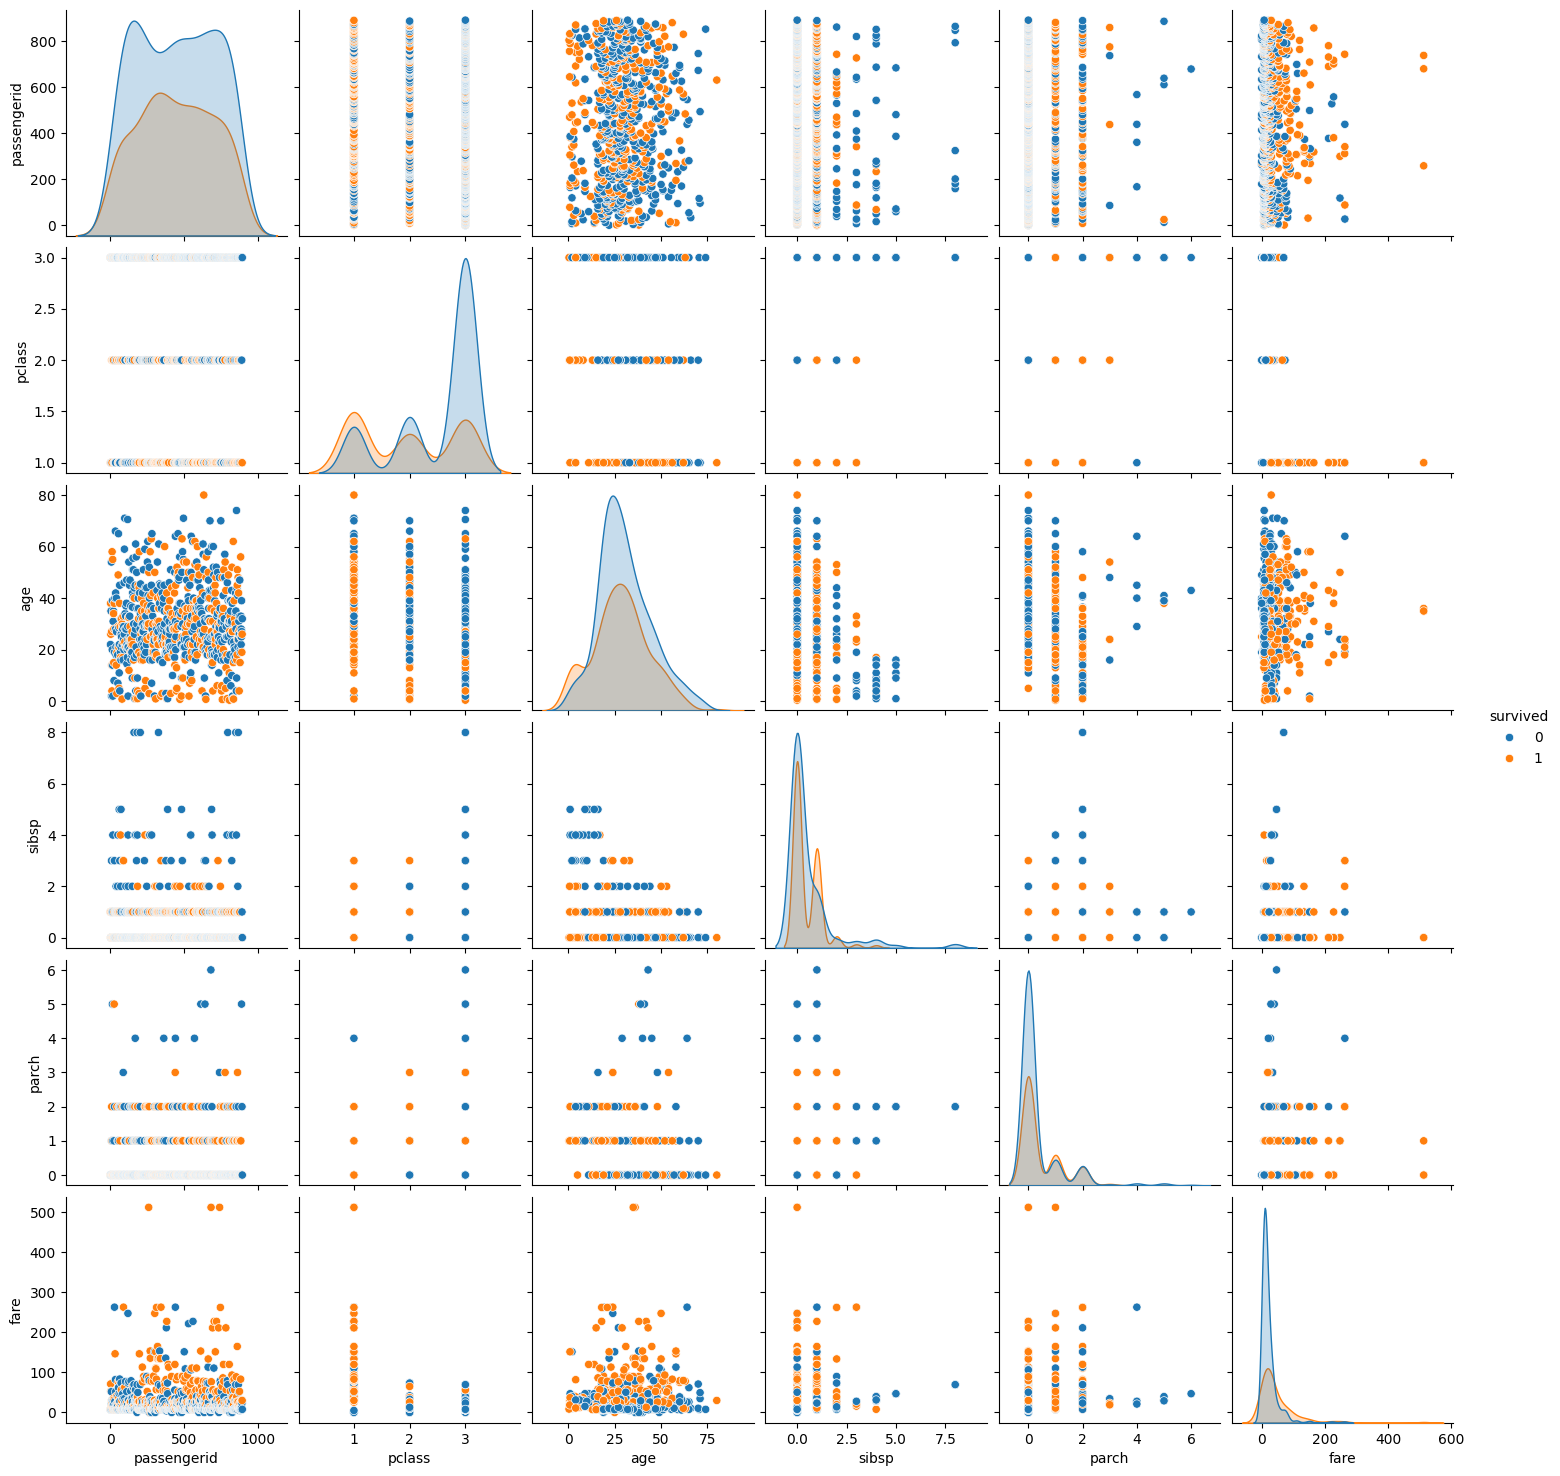

In [9]:
# Use sns.pariplot to visualize.
sns.pairplot(df, hue='survived')
plt.show()
#the blue dots are the ones that survived and the orange dots are the ones that did not survive


# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [10]:
# Convert the sex column into a continuous variable by using pd.get_dummies
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [11]:
# Select our features
selected_features = ['fare', 'sex_male']

# Set X to be the features we are going to use.
X = df[selected_features]

# Set y to be our target variable. 
y = df['survived']

# Split our data into the testing and training groups. 

In [12]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(712, 2) (179, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [13]:
# Initalize our model
model = LogisticRegression()


# Train our model using our training data.
model.fit(X_train, y_train)


LogisticRegression()

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [14]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)

In [15]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

#calculate f1 score
f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.826816
Precision Score: 0.738462
Recall Score: 0.774194
F1 Score 0.755906


<Figure size 800x800 with 0 Axes>

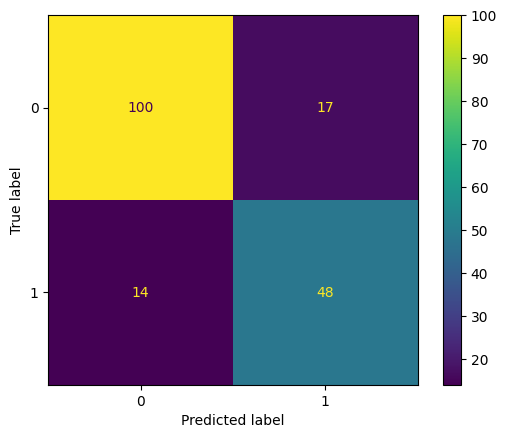

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Plot a confusion matrix of your predicted results. 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)




In [22]:
truepositives = 48
truenegatives = 100
# How many True Positives and True Negatives did your model get?
print(f'{truenegatives} True Negatives and {truepositives} True Positives')

100 True Negatives and 48 True Positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

Accuracy Score: 0.698324
Precision Score: 0.595238
Recall Score: 0.403226
F1 Score 0.480769


<Figure size 800x800 with 0 Axes>

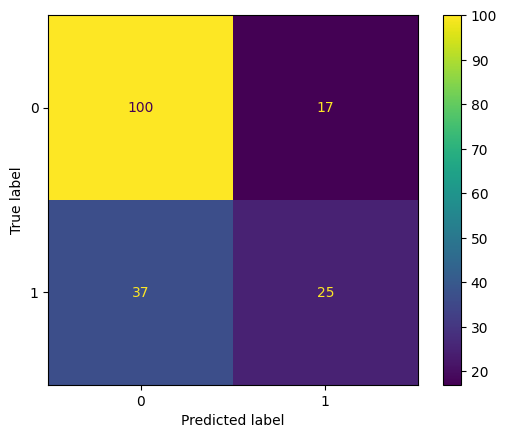

In [24]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
df = pd.get_dummies(df, columns=['pclass', 'embarked'], drop_first=True)

# Update your `selected_features` to include the new pclass and embarked features.
selected_features = ['fare', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S']

# Define your X and y variables
X, y = df[selected_features], df['survived']

# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.
model_2.fit(X_train, y_train)
# Make new predicitions using our testing data. 
y_pred_2 = model_2.predict(X_test)
# Calculate our accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Calculate our precision score
precision_2 = precision_score(y_test, y_pred_2)

# Calculate our recall score
recall_2 = recall_score(y_test, y_pred_2)

# Calculate your f1-score
f1_2 = f1_score(y_test, y_pred_2)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2)



# EXTRA CREDIT 1. 
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

Accuracy Score: 0.687151
Precision Score: 0.583333
Recall Score: 0.338710
F1 Score 0.428571


<Figure size 800x800 with 0 Axes>

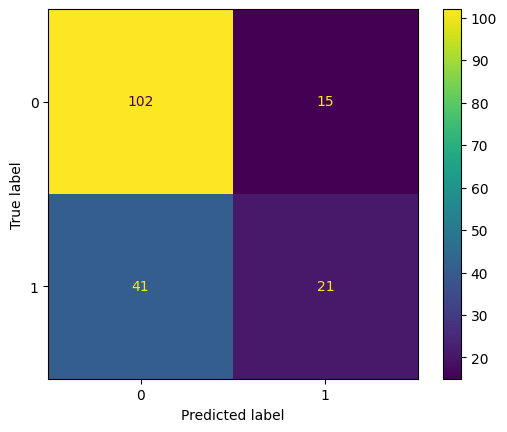

In [25]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)

# Fill null age values with mean age.
df['age'] = df['age'].fillna(value=df['age'].mean())

# Create new traveled_alone feature
df['travel_alone'] = (df['sibsp'] == 0) & (df['parch'] == 0)

# Update your `selected_features` to include the new traveled alone and age
selected_features = ['fare', 'travel_alone', 'age']

# Define your X and y variables
X, y = df[selected_features], df['survived']

# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.
model_3.fit(X_train, y_train)
# Make new predicitions using our testing data. 
y_pred_3 = model_3.predict(X_test)

# Calculate our accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Calculate our precision score
precision_3 = precision_score(y_test, y_pred_3)

# Calculate our recall score
recall_3 = recall_score(y_test, y_pred_3)

# Calculate your f1-score
f1_3 = f1_score(y_test, y_pred_3)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3)

# EXTRA CREDIT 2:  

Use stats models to create a summary report.  Interpret the results. 